In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import skew, norm
import scipy.stats as stats
from scipy.stats import norm

import warnings

warnings.filterwarnings(action="ignore")

In [32]:
data = pd.read_csv('data_3.csv')
data_w = data.copy()
data_w.columns = data_w.columns.str.replace(' ', '')
data_w.info()
data_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed:0.1                        120 non-null    int64  
 1   Unnamed:0                          120 non-null    int64  
 2   price                              120 non-null    int64  
 3   rooms                              101 non-null    float64
 4   area                               107 non-null    float64
 5   kitchen_area                       89 non-null     float64
 6   floor                              107 non-null    float64
 7   renovation                         120 non-null    int64  
 8   deal_type                          120 non-null    int64  
 9   balcony                            120 non-null    int64  
 10  trash_chute                        83 non-null     float64
 11  Годпостройки                       107 non-null    float64

In [33]:
data_w.head()

,Unnamed:0.1,Unnamed:0,price,rooms,area,kitchen_area,floor,renovation,deal_type,balcony,...,latitude,longitude,wall_material_Блочный,wall_material_Железобетон,wall_material_Кирпично-монолитный,wall_material_Кирпичный,wall_material_Монолитно-кирпичный,wall_material_Монолитный,wall_material_Панельный,wall_material_Смешанные
0,0,0,4500000,1.0,22.6,3.0,3.0,1,1,0,...,43.122565,131.907848,False,False,False,False,False,False,True,False
1,1,1,10000000,3.0,75.4,5.0,6.0,1,1,0,...,43.118957,131.968481,False,False,False,False,False,True,False,False
2,2,2,6650000,1.0,31.6,5.0,2.0,0,0,0,...,43.183735,131.925201,False,False,False,True,False,False,False,False
3,3,3,11000000,2.0,47.0,3.1,6.0,0,0,1,...,43.086209,131.854930,False,False,False,False,False,True,False,False
4,4,4,4900000,1.0,24.1,3.0,16.0,0,0,0,...,43.118827,131.970732,False,False,False,False,False,True,False,False


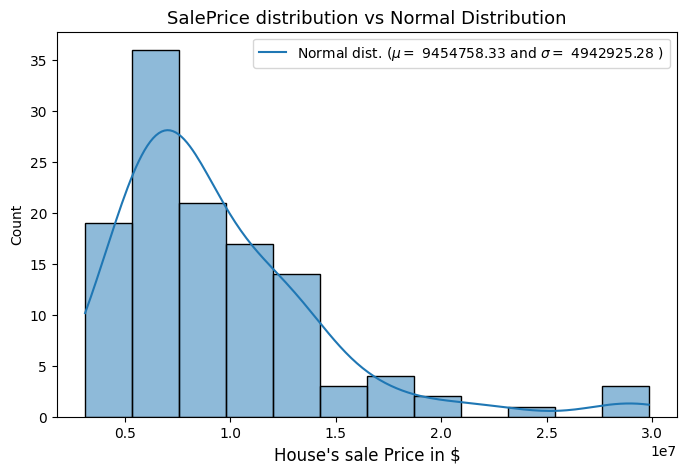

In [34]:
(mu, sigma) = norm.fit(data_w['price'])

plt.figure(figsize = (8,5))
sns.histplot(data_w['price'], kde = True)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel("House's sale Price in $", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

plt.show()

In [35]:
from scipy import stats

shap_t,shap_p = stats.shapiro(data_w['price'])

print("Skewness: %f" % abs(data_w['price']).skew())
print("Kurtosis: %f" % abs(data_w['price']).kurt())
print("Shapiro_Test: %f" % shap_t)
print("Shapiro_Test: %f" % shap_p)

Skewness: 1.919558
Kurtosis: 4.771441
Shapiro_Test: 0.829326
Shapiro_Test: 0.000000


In [40]:
data_w.describe()

,Unnamed:0.1,Unnamed:0,price,rooms,area,kitchen_area,floor,renovation,deal_type,balcony,...,Годпостройки,Количествоэтажей,Лифт,Количествобалконов,Количествоквартир,Количествоподъездов,number_of_owners,number_of_elevators,latitude,longitude
count,120.000000,120.000000,1.200000e+02,101.000000,107.000000,89.000000,107.000000,120.000000,120.000000,120.000000,...,107.000000,116.000000,48.0,84.0,28.000000,1.0,1.0,5.0,111.000000,111.000000
mean,59.500000,59.500000,9.454758e+06,2.069307,52.176636,8.397753,6.177570,0.716667,0.608333,0.441667,...,1995.570093,13.293103,1.0,1.0,238.857143,4.0,2.0,1.0,43.242328,131.248523
std,34.785054,34.785054,4.963650e+06,0.930134,26.069876,4.658423,5.353209,0.452506,0.490169,0.498668,...,25.381286,7.926858,0.0,0.0,200.944200,NaN,NaN,0.0,1.100842,7.208603
min,0.000000,0.000000,3.100000e+06,1.000000,16.800000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1917.000000,2.000000,1.0,1.0,38.000000,4.0,2.0,1.0,43.075123,55.986854
25%,29.750000,29.750000,6.175000e+06,1.000000,36.000000,5.900000,2.000000,0.000000,0.000000,0.000000,...,1975.500000,7.750000,1.0,1.0,139.000000,4.0,2.0,1.0,43.108221,131.903687
50%,59.500000,59.500000,7.900000e+06,2.000000,46.800000,8.000000,5.000000,1.000000,1.000000,0.000000,...,2001.000000,10.000000,1.0,1.0,219.500000,4.0,2.0,1.0,43.125537,131.931541
75%,89.250000,89.250000,1.168750e+07,3.000000,63.150000,10.000000,8.000000,1.000000,1.000000,1.000000,...,2020.000000,23.250000,1.0,1.0,277.250000,4.0,2.0,1.0,43.165277,131.952906
max,119.000000,119.000000,2.985000e+07,4.000000,191.900000,30.000000,24.000000,1.000000,1.000000,1.000000,...,2024.000000,26.000000,1.0,1.0,1080.000000,4.0,2.0,1.0,54.727074,132.148141
